In [15]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
def get_data(model_name, task, title, generation_num):
    data_file_path = f"save_model_{model_name}/{task}/{title}/model_99/result_only_test_{generation_num}.npy"
    data = np.load(data_file_path)
    return data

In [17]:
# task_title_dict = {
#     "addition": ["3hole_1411_0-100", (50, 50)],
#     "mod_addition": ["3hole_3187_0-113", (56, 56)],
#     "base_addition": ["3hole_1899_0-100", (50, 50)],
#     "linear_regression": ["3hole_2243_0-100", (50, 50)],
# }

In [18]:
task_title_dict = {
    "addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    "mod_addition": ["1hole_(56, 56)_10_441_0-113", (56, 56)],
    "base_addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    "linear_regression": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    "rabbits_and_chickens": ["1hole_(70, 50)_10_441_0-100", (70, 50)]
}

In [19]:
# task_title_dict = {}
# for length in [5, 10, 15, 20]:
#     task_title_dict[length] = f"1hole_(50, 50)_{length}_{(2*length+1)**2}_0-100"

In [20]:
model_name = "gpt2"
generation_num = 30


0it [00:00, ?it/s]

441


2it [00:00,  4.90it/s]

441
441


3it [00:00,  4.78it/s]

441


4it [00:00,  4.40it/s]

441


5it [00:01,  4.37it/s]


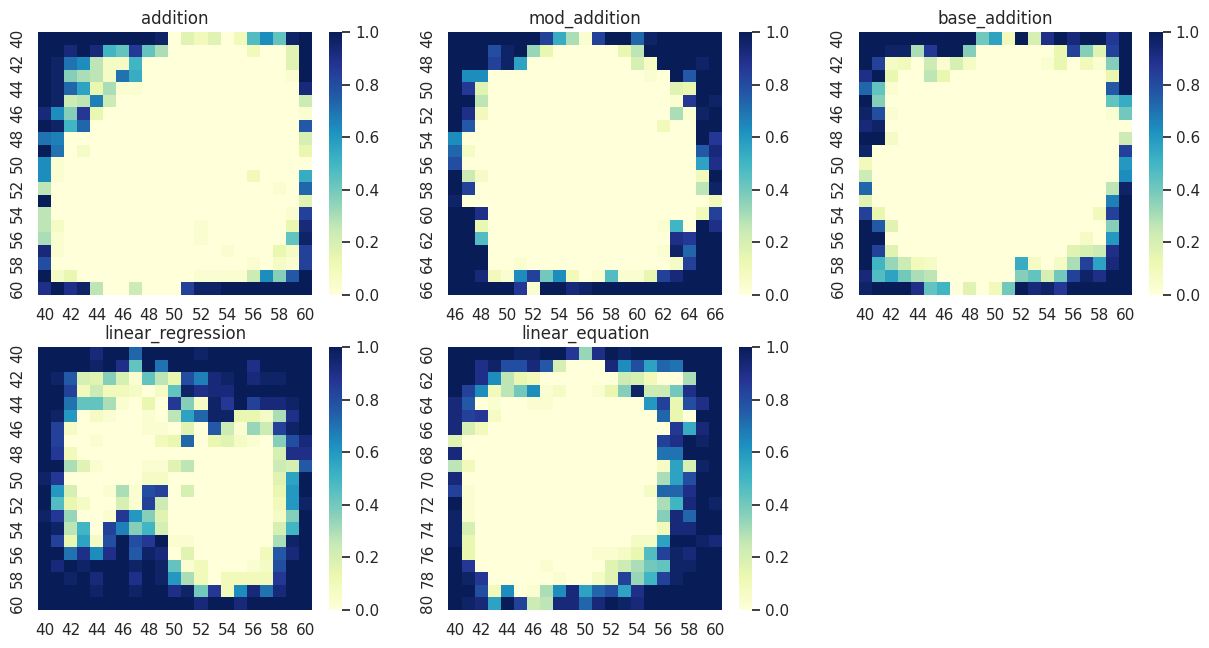

In [29]:
# ax = sns.heatmap(data)
fig, ax = plt.subplots(2,3, figsize=(15, 7.5))
for idx, task in tqdm(enumerate(task_title_dict.keys())):
    title, center = task_title_dict[task]
    rows = np.arange(center[0]-10, center[0]+10+1)
    columns = np.arange(center[1]-10, center[1]+10+1)
    data = get_data(model_name, task, title, generation_num)
    print(data.size)
    df = pd.DataFrame(data=data, columns = columns, index=rows)
    axesSub = sns.heatmap(data=df, ax=ax[idx//3][idx%3], cmap="YlGnBu")
    # axesSub = sns.heatmap(data=df, ax=ax[idx], cmap="YlGnBu")
    title = task if task != "rabbits_and_chickens" else "linear_equation"
    axesSub.set_title(title)
    # axesSub.set_title(f"$l_k$={2*10}")
fig.delaxes(ax[1][2])

# ax = sns.heatmap(df, cmap="YlGnBu")
# fig = ax.get_figure()

In [22]:
ax

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [ ]:
fig.savefig("holes.pdf")

In [ ]:
# data.size

1681